### Clone Source https://github.com/McCrearyD/semantic-segmentation.git

In [1]:
import os
from time import time
from PIL import Image, ImageEnhance, ImageFilter
import numpy as np
from utils import helpers

np.set_printoptions(edgeitems=10)

## Load pretrained weights

In [2]:
net, img_transforms, args = helpers.setup_net('../models/kitti_best.pth')

Using regular batch norm
Net built.
Net restored.


In [3]:
# setup net from generated training model
# net, img_transforms, args = helpers.setup_net('gen_models/best_epoch_1_mean-iu_0.73394.pth')

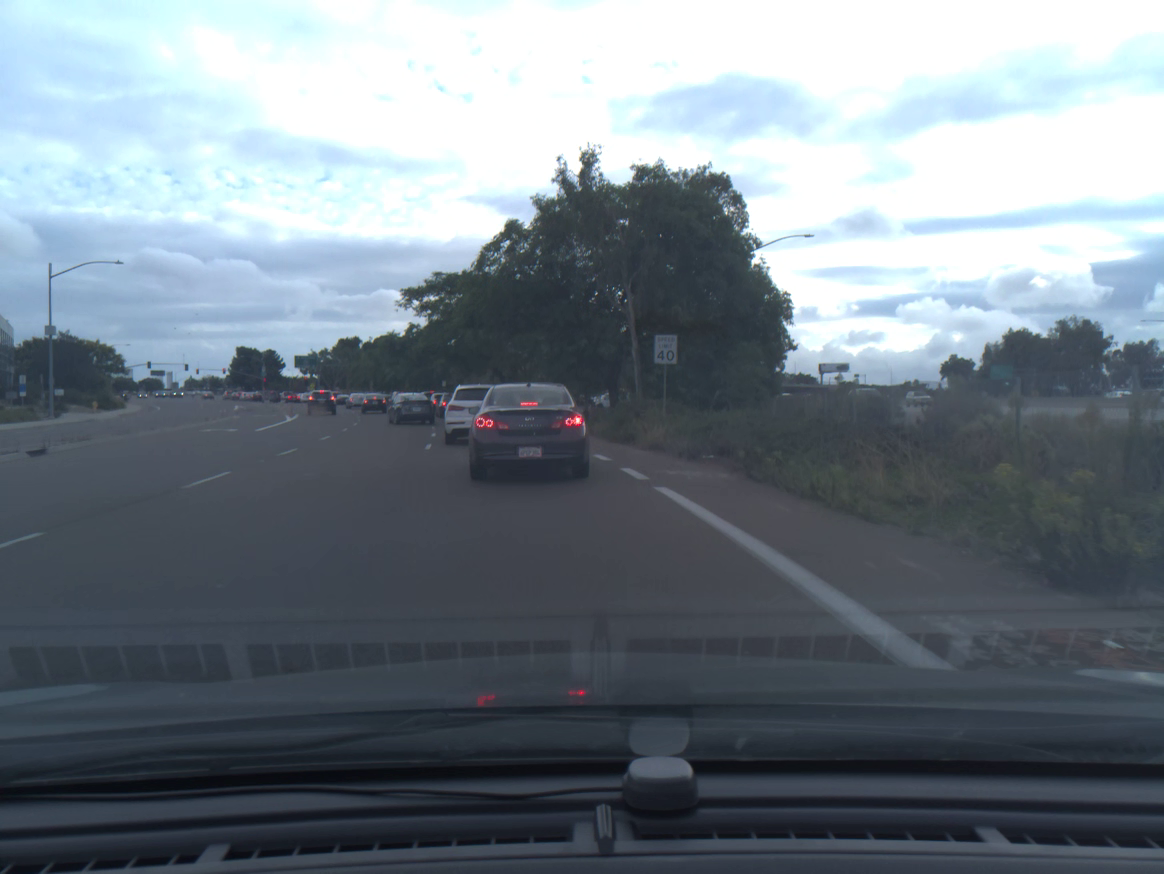

In [4]:
img_dir = 'comma10k/imgs'
segz_dir = 'comma10k/segz'
ims = os.listdir(img_dir)
x = Image.open(os.path.join(img_dir, ims[5]))
x_np = np.array(x)

# edges = x.filter(ImageFilter.FIND_EDGES)
# edges.putalpha(128)
# x.paste(edges, (0, 0), edges)
# x = edges

# contrast = ImageEnhance.Contrast(x)
# enhanced = contrast.enhance(0.9)
# x = enhanced
# x_np = np.array(enhanced)

x_np = np.array(x)
x

In [6]:
# avg_one_img = dt / N_predictions
# print('Average inference time: %.6fs per image.' % avg_one_img)

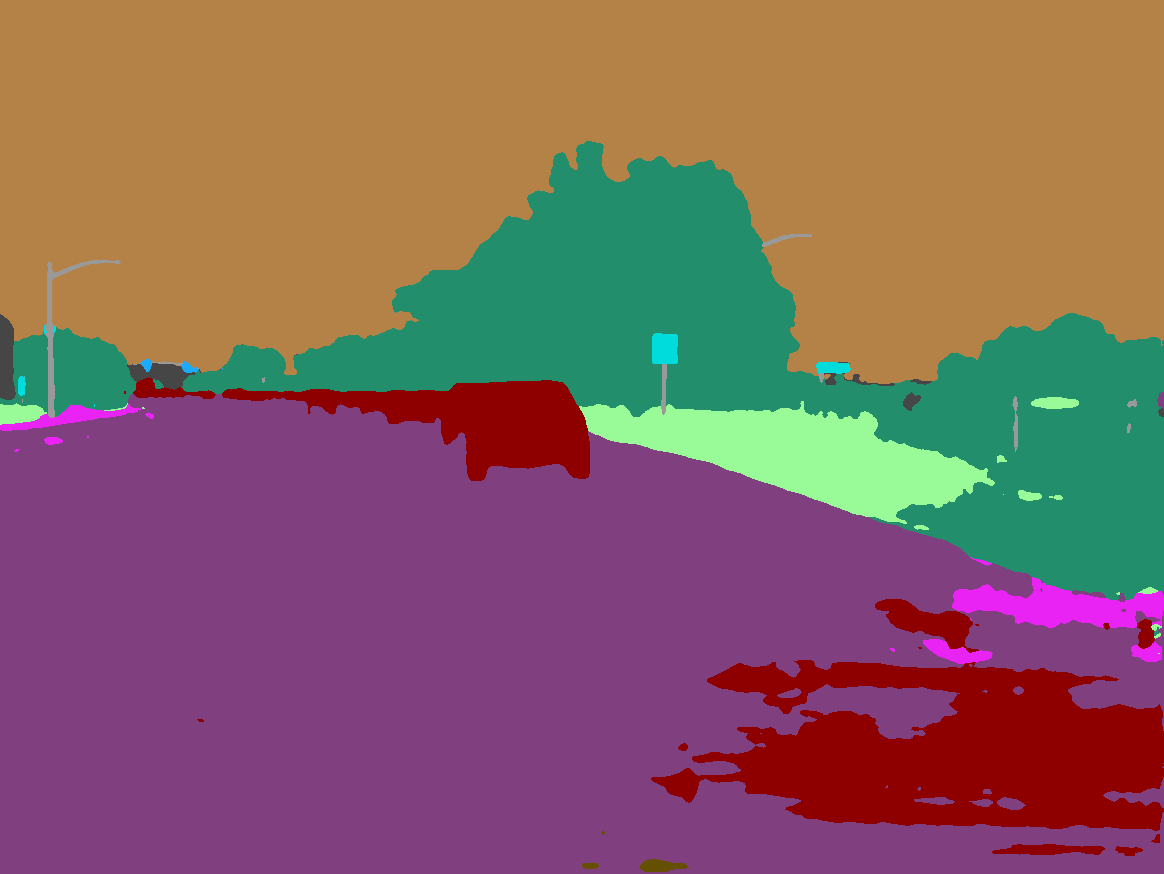

In [7]:
# Image segmentation prediction
p_pred = Image.fromarray(p_color)
p_pred

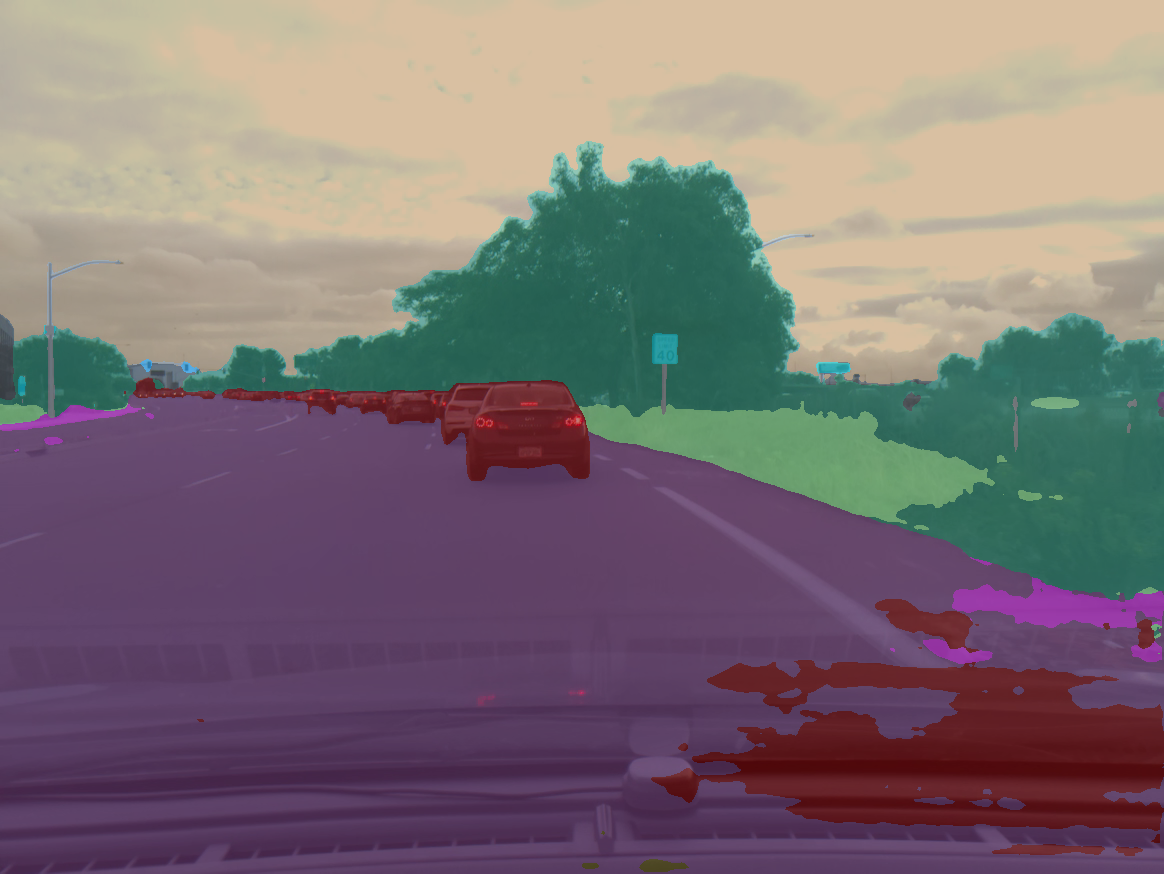

In [8]:
# Image segmentation over subject image
p_masked = Image.fromarray(x_np + p_color)
p_masked

background = Image.fromarray(x_np)
foreground = Image.fromarray(p_color)
foreground.putalpha(128)
background.paste(foreground, (0, 0), foreground)
background

In [9]:
# The predicted classes for individual pixels,specifically for the edges
print(p)

[[10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 [10 10 10 10 10 10 10 10 10 10 ... 10 10 10 10 10 10 10 10 10 10]
 ...
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 ...  0  0  0  0  0  0  0 

In [10]:
# Show all existing classes in given image
uniq_labels = set(p.flatten())
print("All unique labels in given image: {}".format(uniq_labels))

All unique labels in given image: {0, 1, 2, 5, 6, 7, 8, 9, 10, 13, 16}


In [ ]:
# run these commands for training

# !rm kitti_tile300_cv2_train_hardnm0.json
# !rm -rf logs
# !sh "scripts/train_commakitti_WideResNet38.sh"

In [11]:
helpers.predict_video(net, img_transforms, args, 'videos/car_crash2.mp4', 'videos/carcrash_output4.mp4', every_nth_frame=1)

Running inference on video with path: videos/car_crash2.mp4
Frames in video: 43699 
Total frames to be processed: 43699 

Finished.99/43699	Average Inference: 0.302s	ETA: 0.0mmm
